In [39]:
#Encoding Categorical Variables + EDA Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [44]:
# 1. Load the dataset (after missing values handled by Member 1)
df = pd.read_csv("../results/outputs/handledMissingValues.csv")

print(f"Dataset shape: {df.shape}")
print("\nDataset info: ")
print(df.info())     #Displays column names, non-null counts, and data types

Dataset shape: (3583, 8)

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3583 non-null   object 
 1   year           3583 non-null   float64
 2   selling_price  3583 non-null   float64
 3   km_driven      3583 non-null   float64
 4   fuel           3583 non-null   object 
 5   seller_type    3583 non-null   object 
 6   transmission   3583 non-null   object 
 7   owner          3583 non-null   object 
dtypes: float64(3), object(5)
memory usage: 224.1+ KB
None


In [45]:
# 2. Define categorical variables to encode
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
print("Categorical Columns to Encode:", categorical_cols)

Categorical Columns to Encode: ['fuel', 'seller_type', 'transmission', 'owner']


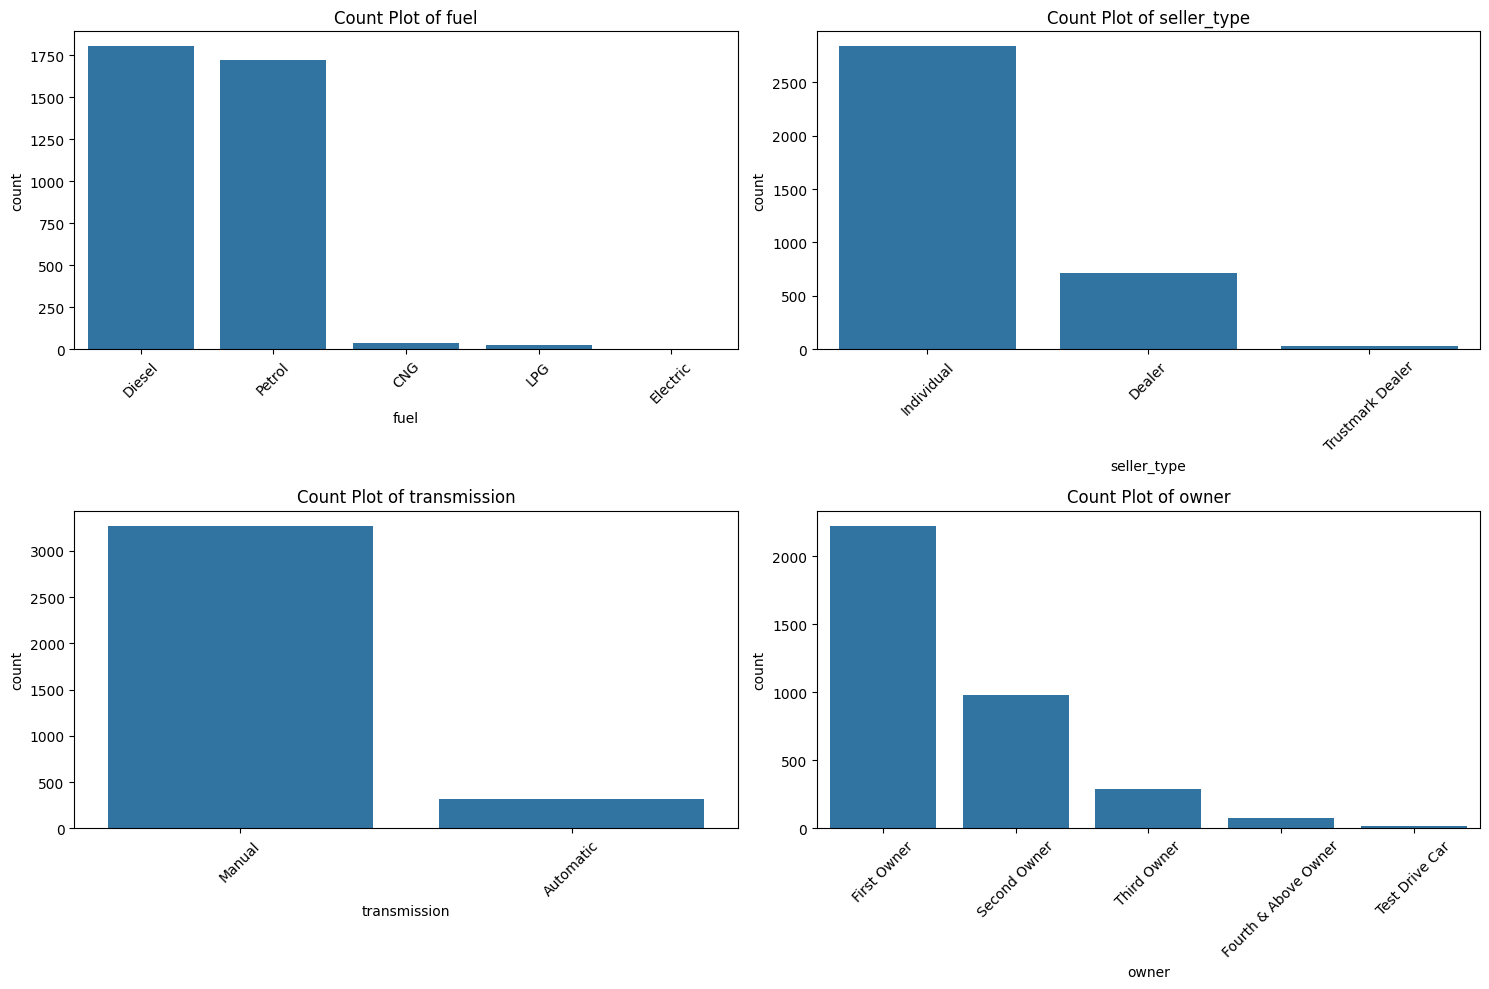

In [46]:
# Task 1: EDA Visualization (Count Plots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid
axes = axes.flatten()                          # Flatten 2x2 array to 1D for easy indexing

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()     #Automatically adjusts spacing between subplots
plt.savefig('../results/eda_visualizations/encodedcountplots.png')  # Save all in one image
plt.show()

In [47]:
# Task 2: Encoding Categorical Variables
# 1. Label Encoding for ordinal-like variables

df_encoded = df.copy()
label_enc = LabelEncoder()  #Initializes a LabelEncoder object for converting categories to numbers

ordinal_cols = ['transmission', 'owner']

for col in ordinal_cols:
    if col in df_encoded.columns:
        df_encoded[col] = label_enc.fit_transform(df_encoded[col])
        print(f"Label Encoded {col}: {df_encoded[col].dtype}")
    else:
        print(f"Column {col} not found in dataset!")


Label Encoded transmission: int64
Label Encoded owner: int64


In [48]:
# 2. One-Hot Encoding for nominal variables
nominal_cols = ['fuel', 'seller_type']
# Only keep columns that exist
nominal_cols_existing = [col for col in nominal_cols if col in df_encoded.columns]

df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols_existing, drop_first=True)

print("\nData after relevant encoding (first 5 rows):")
print(df_encoded.head())

print("\nColumn types after encoding:")  
print(df_encoded.dtypes)  #S hows data types of all columns after encoding



Data after relevant encoding (first 5 rows):
                       name    year  selling_price  km_driven  transmission  \
0             Maruti 800 AC  2007.0   60000.000000    70000.0             1   
1  Maruti Wagon R LXI Minor  2007.0  504355.832295    50000.0             1   
2      Hyundai Verna 1.6 SX  2012.0  600000.000000   100000.0             1   
3    Datsun RediGO T Option  2017.0  250000.000000    46000.0             1   
4     Honda Amaze VX i-DTEC  2014.0  450000.000000   141000.0             1   

   owner  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0      0        False          False     False         True   
1      0        False          False     False         True   
2      0         True          False     False        False   
3      0        False          False     False         True   
4      2         True          False     False        False   

   seller_type_Individual  seller_type_Trustmark Dealer  
0                    True                 

In [49]:
df = df_encoded
df.to_csv('../results/outputs/encoded_data.csv')